<a href="https://colab.research.google.com/github/ajrianop/Models/blob/main/3_MultipleRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multiple Regression**

In these cases where want to study some dependent variable according to several independant variables. In that way, we are goin to use multiple regression.<br>

Note that if the amount of dependant variables we want to study is more than one, we are going to lead with a problem of multivariate regression, which is different than multiple regression.

**Multiple regression** also called as a multiple linear regression. The model that we are going to obtain is associated to the expression 
$$y= \alpha_1x_1+\alpha_2 x_2+ \cdots + \alpha_n x_n,$$
where $\alpha_i$ are the coefficients and $x_n$ are the features we need to make our prediction.<br>
The coefficients says to us how important each factor is, whenever our data is normalized. So if one coefficient is near to zero, it is possible that this feature is not relevant.<br>
We are going to measure the $R^2$ with the OLS model. (package to use statsmodel)



## **Example**

Importing libraries

In [45]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

We are going to use a dataset given by the instructor Frank Kane, given in
URL http://cdn.sundog-soft.com/Udemy/DataScience/cars.xls

In [ ]:
df = pd.read_excel('http://cdn.sundog-soft.com/Udemy/DataScience/cars.xls')

In case that this links does not 

In [4]:
#from google.colab import drive
#drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [6]:
#df=pd.read_excel("/content/gdrive/MyDrive/Programming Topics/Models/dataset/cars.xls")
#df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


Let us inspect the dataset for `Mileage` and `Price` :

In [14]:
df1=df[['Mileage','Price']]
#Maximum value
print(max(df1['Mileage']))
#Minimum value
print(min(df1['Mileage']))

50387
266


We can note that the maximun value is 50387 and the minumum value is 266. So, we can compute the means according to bins (grouping) generated by an interval of prices:

Table of Mileage and Price by interval 
                      Mileage         Price
Mileage                                   
(0, 5000]        2710.285714  24197.742182
(5000, 10000]    7420.303030  24032.424077
(10000, 15000]  12623.274510  22951.041904
(15000, 20000]  17986.450000  21321.627393
(20000, 25000]  22382.625571  20626.774748
(25000, 30000]  26694.408163  19759.906246
(30000, 35000]  32316.266667  19868.399839
(35000, 40000]  37035.823529  18392.327285
(40000, 45000]  41701.250000  31308.872576
(45000, 50000]  48991.000000  28777.959695


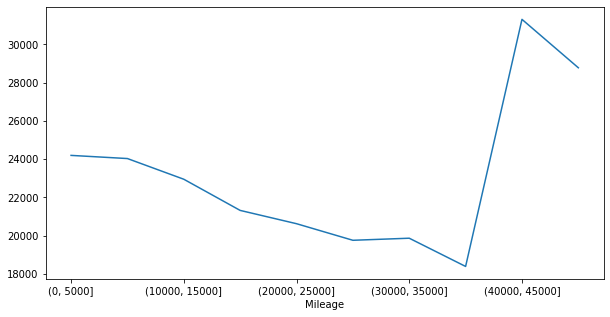

In [43]:
#Generate a bin to see the behaviour of the prices
bins=np.arange(0,55000,5000)
#Generating the mean of the Mileage and Prices by means the partition given by bins
groups = df1.groupby(pd.cut(df1['Mileage'],bins)).mean()
print("Table of Mileage and Price by interval \n", groups)
#Plotting using pandas method
groups['Price'].plot.line(figsize=(10, 5))

We want to predict the price according to several features, so we are going to use the multiple regression. We need to take care with ordinal values, due to this values should be described as a numerical values to be able to make the prediction properly.
In order to do that, we have to change the scale of our features, due to the final coefficients change if our information is not standarized. In this example we are going to use the StandardScaler from sklearn

In [61]:
from re import X
#We initialize the scale
scale=StandardScaler()
X= df[['Mileage','Cylinder','Doors']]
y= df['Price']
X[['Mileage','Cylinder','Doors']]=scale.fit_transform(X[['Mileage','Cylinder','Doors']].values)
#Add a column with constant 1
X = sm.add_constant(X)
print(X)
#Ordinal Least Squares model
est = sm.OLS(y, X).fit()

print(est.summary())


     const   Mileage  Cylinder     Doors
0      1.0 -1.417485   0.52741  0.556279
1      1.0 -1.305902   0.52741  0.556279
2      1.0 -0.810128   0.52741  0.556279
3      1.0 -0.426058   0.52741  0.556279
4      1.0  0.000008   0.52741  0.556279
..     ...       ...       ...       ...
799    1.0 -0.439853   0.52741  0.556279
800    1.0 -0.089966   0.52741  0.556279
801    1.0  0.079605   0.52741  0.556279
802    1.0  0.750446   0.52741  0.556279
803    1.0  1.932565   0.52741  0.556279

[804 rows x 4 columns]
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     150.0
Date:                Mon, 16 Jan 2023   Prob (F-statistic):           3.95e-77
Time:                        22:00:59   Log-Likelihood:                -8356.7
No. Observ

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


We can see that in the model that:
1. Mileage has a negative coefficient which seem reasonable, because if the car has more mileage, the prices would decrease.
2. The number of cylinder seems to be a great impact in the price due to is the greatest coefficient in the model. (Affects the model more than the other features)
3. More doors seems to lead dicreasing in prices. This could be related with sport cars, which are more expensive and this usually has a less amount of doors. Let us see if this conclusion has any sense. The idea is to see which is the mean given by cars with different amount of doors:

In [76]:
#carByDoors=df.groupby
priceCarByDoors=y.groupby(df.Doors).mean()
priceCarByDoors.to_frame()

,Price
Doors,
2,23807.135520
4,20580.670749


In fact, we can see a little bit difference between cars with 2 doors and those with 4 doors.

## **Using the model**

Now, we generate a possible case which contains the following information:
* Mileage.
* Cylinder.
* Doors.<br>
After generate this array we need to re-scale it with `scale` previously anounced, then we have to add the constant 1 in the column 0 in order to run the model.

In [101]:
Sample = [35000, 8, 4]
Features= ['Mileage', 'Cylinder', 'Doors']
#Using the StandardScaler as scale
scaledSample = scale.transform([Sample])
print(scaledSample)
#Adding the column with constant 1
scaledSample = np.insert(scaledSample[0], 0, 1)
print(scaledSample)
#Using the model to predict
predictionCarPrice  = est.predict(scaledSample)
predictionCarPrice

[[1.85174666 1.96971667 0.55627894]]
[1.         1.85174666 1.96971667 0.55627894]


array([29211.45571751])

In [110]:
print('The price of the car with ')
for i,j in zip(Sample, Features):
  print(j, ': ', i)
print('is: USD$', predictionCarPrice[0])

The price of the car with 
Mileage :  35000
Cylinder :  8
Doors :  4
is: USD$ 29211.455717509685


Let us write a function which allow us to conclude quickly

In [116]:
def conclusion(dataSample, features):
  #Using the StandardScaler as scale
  scaledSample = scale.transform([dataSample])
  #Adding the column with constant 1
  scaledSample = np.insert(scaledSample[0], 0, 1)
  #Using the model to predict
  predictionCarPrice  = est.predict(scaledSample)
  '''
  Function which describe the conclusion using the trained OLS model
  '''
  print('The price of the car with ')
  for i,j in zip(dataSample, features):
    print(j, ': ', i)
  print('is: USD$', predictionCarPrice[0])

In [120]:
Sample2=[25000, 8, 2]
Features=['Mileage', 'Cylinder', 'Doors']
conclusion(Sample2, Features)

The price of the car with 
Mileage :  25000
Cylinder :  8
Doors :  2
is: USD$ 34070.98146666367
